# Unit-economy. Evaluate the entertainment  product payback of an advertising, LTV, CAC and ROI



Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцевбизнес постоянно нес убытки - в привлечение пользователей была инвестированна крупная сумма, но эффективности не увиделт. Попробуем разобраться в причинах этой ситуации.

В нашем в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.

## Загрузим данные и подготовим их к анализу

Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет

In [1]:
import pandas as pd
import numpy as np
import time
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

from datetime import datetime
from datetime import date, timedelta as td


visits, orders, costs = (
   pd.read_csv('/datasets/visits_info_short.csv'),  # визиты
   pd.read_csv('/datasets/orders_info_short.csv'),  # заказы
   pd.read_csv('/datasets/costs_info_short.csv')  # траты на рекламу
)

#print(visits, orders, costs)
display(visits, orders, costs.head(10))


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [2]:
#print(visits, orders, costs)
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
User Id          309901 non-null int64
Region           309901 non-null object
Device           309901 non-null object
Channel          309901 non-null object
Session Start    309901 non-null object
Session End      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
User Id     40212 non-null int64
Event Dt    40212 non-null object
Revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
Channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [3]:
print('дубликаты в visits:',visits.duplicated().sum())
print('дубликаты в orders:',orders.duplicated().sum())
print('дубликаты в costs:',costs.duplicated().sum())

дубликаты в visits: 0
дубликаты в orders: 0
дубликаты в costs: 0


Приводим наименования столбцов к нижнему регистру. Заменяем пробел на нижнее подчеркивание

In [4]:
visits.columns = map(str.lower, visits.columns)
visits.columns = visits.columns.str.replace(' ', '_')
visits['session_start'] = pd.to_datetime(visits['session_start'])
#visits['session_start'] = pd.to_datetime(visits['session_start']).dt.strftime('%Y-%m-%d')

visits['session_end'] = pd.to_datetime(visits['session_start'])
#visits['session_end'] = pd.to_datetime(visits['session_end']).dt.strftime('%Y-%m-%d')

visits['channel'] =  visits['channel'].astype(str)

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
user_id          309901 non-null int64
region           309901 non-null object
device           309901 non-null object
channel          309901 non-null object
session_start    309901 non-null datetime64[ns]
session_end      309901 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [5]:
orders.columns = map(str.lower, orders.columns)
orders.columns = orders.columns.str.replace(' ', '_')
#orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders['event_dt'] = pd.to_datetime(orders['event_dt']).dt.strftime('%Y-%m-%d')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
user_id     40212 non-null int64
event_dt    40212 non-null object
revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
costs.columns = map(str.lower, costs.columns)
costs.columns = costs.columns.str.replace(' ', '_')
#costs['dt'] = pd.to_datetime(costs['dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.strftime('%Y-%m-%d')

costs['channel'] = costs['channel'].astype(str)

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


## Задаем функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

In [7]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = pd.to_datetime(profiles['first_ts'])

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

            
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    new_users['dt'] = pd.to_datetime(new_users['dt']).dt.strftime('%Y-%m-%d')
    profiles['dt'] = pd.to_datetime(profiles['dt']).dt.strftime('%Y-%m-%d')

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    # выручка с каждого пользователя.
    orders_user_grouped = orders.groupby('user_id')["revenue"].sum().reset_index(name='revenue')
    
    # добавляем выручку к основной таблице
    profiles = profiles.merge(orders_user_grouped, on = 'user_id', how = 'left')
    profiles['revenue'] = profiles['revenue'].fillna(0)

    return profiles

#profiles = get_profiles(visits, orders, costs)
#profiles.tail(50)

Задаем функцию для расчёта удержания

In [8]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [9]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [10]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.drop(columns=('revenue'))
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # что мы здесь делаем???
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

функция для расчёта LTV и ROI

In [11]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [12]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('окупаемость инвестиций ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Функци для расчета конверсии

In [13]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция для визуализации конверсии

In [14]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Проведем исследовательский анализ данных

Построим профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

### Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей.

In [15]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,revenue
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172,14.97
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237,0.00
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235,0.00
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769,0.00


Определяем минимальную и максимальную даты привлечения пользователей:

In [16]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()

In [17]:
print('Минимальная дата привлечения пользователей:',min_analysis_date, "\n", 'Максимальная дата привлечения пользователей:',observation_date)

Минимальная дата привлечения пользователей: 2019-05-01 
 Максимальная дата привлечения пользователей: 2019-10-27


### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей

In [18]:
#Из каких стран пользователи приходят в приложение
 
profiles.groupby('region')["user_id"].count().sort_values(ascending = False).reset_index(name='count').head(10)

,region,count
0,United States,100002
1,UK,17575
2,France,17450
3,Germany,14981


Отберем только платящих пользователей.

In [19]:
profiles_pay=profiles.query('revenue > 0')
profiles_pay.groupby('region')["user_id"].count().sort_values(ascending = False).reset_index(name='count').head()

,region,count
0,United States,6902
1,UK,700
2,France,663
3,Germany,616


Строим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [20]:
country_pay = pd.DataFrame()
country_pay['users_count'] = profiles_pay.groupby('region')['user_id'].count()
country_pay['percentage'] = ((country_pay['users_count'] / profiles_pay['user_id'].count()) * 100)
country_pay.sort_values(by='percentage', ascending=False).style.format({'percentage': '{:.2f}%'})

,users_count,percentage
region,,
United States,6902,77.72%
UK,700,7.88%
France,663,7.47%
Germany,616,6.94%


In [50]:
profiles.groupby('region')["payer"].agg(['count', 'mean']).style.format({'mean': '{:.2%}'})

,count,mean
region,,
France,11058,5.01%
Germany,9528,5.14%
UK,11154,5.10%
United States,61829,9.88%


In [21]:
df_example = pd.DataFrame({'percentage': [0.1, 0.2, 0.3, 0.4], 'action': [1,2, 3, 4]})
df_example.style.format({'percentage': '{:.2%}'})

,percentage,action
0,10.00%,1
1,20.00%,2
2,30.00%,3
3,40.00%,4


### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

С каких устройств чаще всего заходят пользователи

In [22]:
profiles.groupby('device')["user_id"].count().sort_values(ascending = False).reset_index(name='count').head()

,device,count
0,iPhone,54479
1,Android,35032
2,PC,30455
3,Mac,30042


С каких устройств чаще всего заходят платящие пользователи

In [23]:
profiles_pay.groupby('device')["user_id"].count().sort_values(ascending = False).reset_index(name='count').head()

,device,count
0,iPhone,3382
1,Android,2050
2,Mac,1912
3,PC,1537


In [24]:
#По каким рекламным каналам шло привлечение пользователей?
profiles.groupby('channel')["user_id"].count().sort_values(ascending = False).reset_index(name='count').head(10)

,channel,count
0,organic,56439
1,FaceBoom,29144
2,TipTop,19561
3,OppleCreativeMedia,8605
4,WahooNetBanner,8553
5,LeapBob,8553
6,RocketSuperAds,4448
7,MediaTornado,4364
8,YRabbit,4312
9,AdNonSense,3880


Процент платящих клиентов, в разбивке по каналам привлечения

In [25]:
channel_percentage = pd.DataFrame()
channel_percentage['users_cnt'] = profiles_pay.groupby('channel')['user_id'].count()
channel_percentage['percentage'] = ((channel_percentage['users_cnt'] / profiles_pay['channel'].count()) * 100)
channel_percentage.sort_values(by='percentage', ascending=False).style.format({'percentage': '{:.2f}%'})

,users_cnt,percentage
channel,,
FaceBoom,3557,40.05%
TipTop,1878,21.15%
organic,1160,13.06%
WahooNetBanner,453,5.10%
AdNonSense,440,4.95%
RocketSuperAds,352,3.96%
LeapBob,262,2.95%
OppleCreativeMedia,233,2.62%
lambdaMediaAds,225,2.53%


Процент платящих клиентов в разбивке по устройствам

In [26]:
device_percentage = pd.DataFrame()
device_percentage['users_cnt'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_percentage['share'] = ((device_percentage['users_cnt'] / profiles.query('payer == True')['device'].count()) * 100)
device_percentage.sort_values(by='share', ascending=False).style.format({'share': '{:.2f}%'})

,users_cnt,share
device,,
iPhone,3382,38.08%
Android,2050,23.08%
Mac,1912,21.53%
PC,1537,17.31%


## Маркетинг

Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Считаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени.

In [27]:
display(costs['costs'].sum())

105497.30000000002

определим каналы, из которых пришло больше всего платящих пользователей

In [28]:
cost_group = pd.DataFrame()
cost_group['costs'] = costs.groupby('channel')['costs'].sum()
cost_group['percentage'] = ((cost_group['costs'] / costs['costs'].sum()) * 100)
cost_group.sort_values(by='percentage', ascending=False).style.format({'share': '{:.2f}%', 'percentage': '{:.2f}%'})

,costs,percentage
channel,,
TipTop,54751.3,51.90%
FaceBoom,32445.6,30.75%
WahooNetBanner,5151,4.88%
AdNonSense,3911.25,3.71%
OppleCreativeMedia,2151.25,2.04%
RocketSuperAds,1833,1.74%
LeapBob,1797.6,1.70%
lambdaMediaAds,1557.6,1.48%
MediaTornado,954.48,0.90%


Пользователи, которые пришли через каналы TipTop, FaceBoom приносят больше всего прибыли.

Изучим рекламные источники привлечения





Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

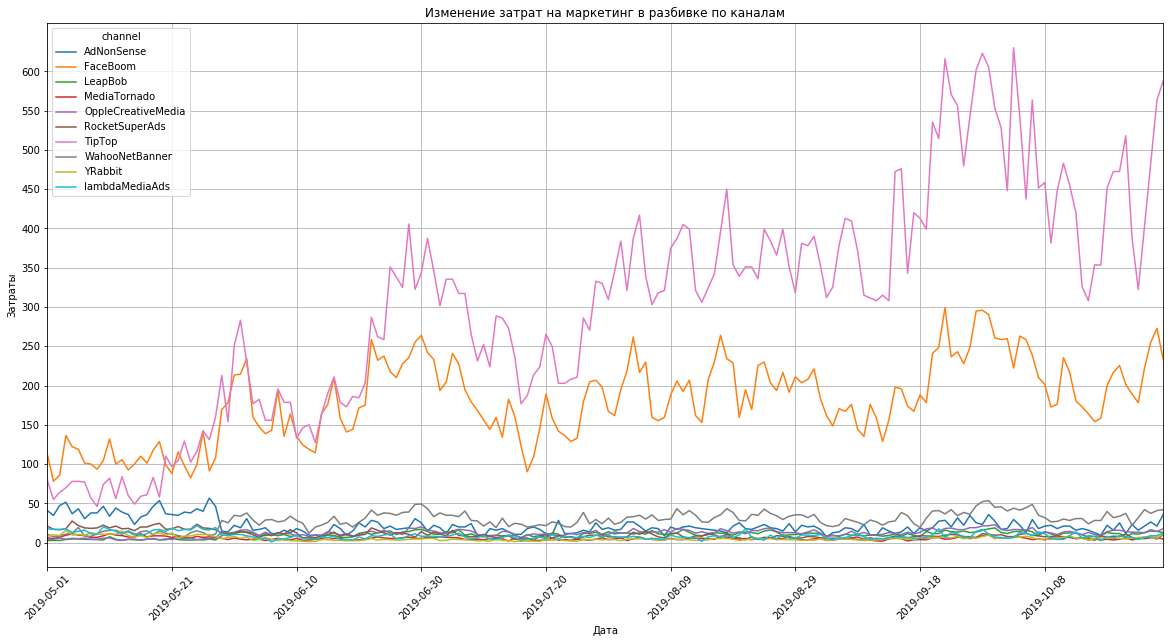

In [29]:
cost_during = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
cost_during.plot(                                             
           figsize=(20, 10), 
           grid=True,
           rot=45, 
) 

plt.yticks(np.arange(0, 650, 50))
plt.title('Изменение затрат на маркетинг в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

На привлечение новых клиентов больше всего потратили через  каналы TipTop и FaceBoom.В сентябре и октябре через канал TipTop было потрачено наибольшее количество средств.Затраты на канал Tip-Top постепенно увеличиваются. 
На привлечение через каналы AdNonSence, LeapBob, MediaTornado, OppleCreativeMedia, RocketSuperAds,WahooNetBanner, YRabbit и lambdaMediaAds было потрачено намного меньше средств. Необходимо рассмотреть затраты через эти каналы привлечения без учёта TipTop и FaceBoom.

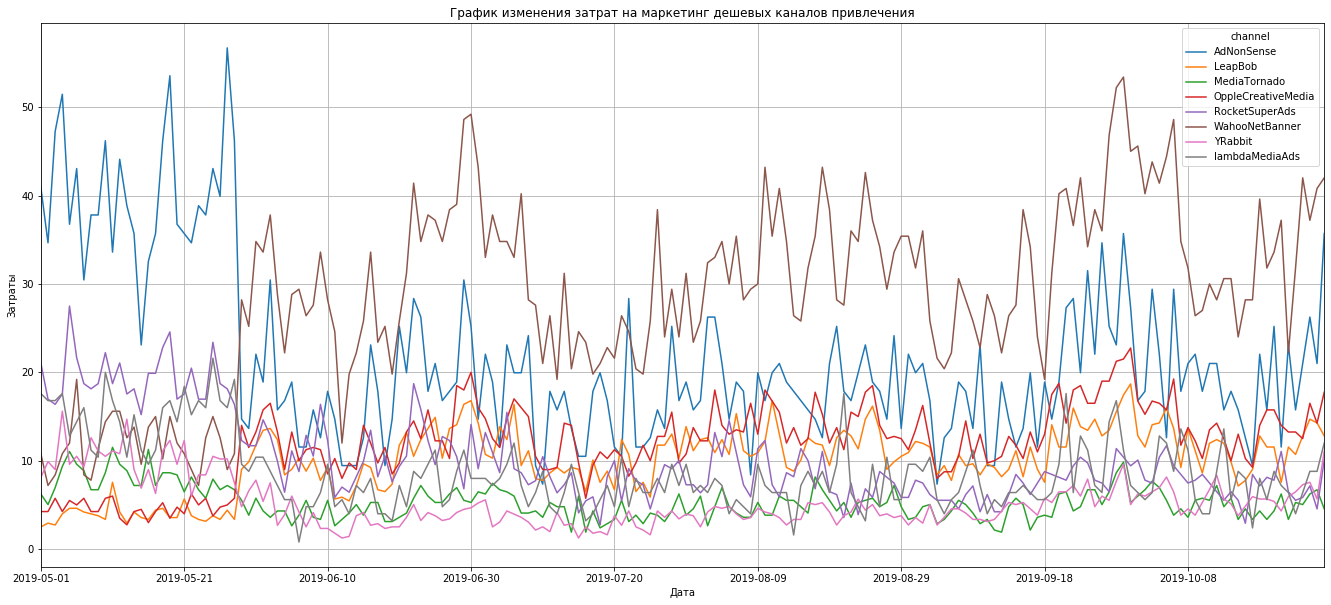

In [30]:
cost_during_cheap = costs[~costs['channel'].isin(['TipTop', 'FaceBoom'])].pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )

cost_during_cheap.plot(                                             
           figsize=(23, 10),
           grid=True
) 

plt.yticks(np.arange(0,  60, 10))
plt.title('График изменения затрат на маркетинг дешевых каналов привлечения')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Затраты на WahooNetBanner, AdNonSence самые большие среди дешевых каналов привлечения. При этом затраты AdNonSence увеличивались в в мае до значений 50+, и резко снизились в июне. WahooNetBanner - напротив, в мае имели наименьшие показатели и в конце июня резко увеличились.

### Посчитаем среднюю стоимость привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика.

Посчитаем  стоимость привлечения одного клиента (CAC). 

In [31]:
profiles_pay.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,revenue
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172,14.97
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-30 03:46:29,True,1.008000,4.99
61,374052872,2019-08-08 15:42:57,TipTop,Mac,United States,2019-08-08,2019-08-08 15:42:57,True,2.972222,39.92
71,414791703,2019-05-03 12:01:28,TipTop,iPhone,United States,2019-05-03,2019-05-03 12:01:28,True,1.049180,49.90
124,785077127,2019-06-27 08:31:39,TipTop,Mac,United States,2019-06-27,2019-06-27 08:31:39,True,2.539062,99.89


In [32]:
profiles.describe()

,user_id,acquisition_cost,revenue
count,1.500080e+05,150008.000000,150008.000000
mean,4.993238e+11,0.703278,1.439676
std,2.889483e+11,0.954097,7.911450
min,5.993260e+05,0.000000,0.000000
25%,2.489249e+11,0.000000,0.000000
50%,4.977046e+11,0.247500,0.000000
75%,7.494919e+11,1.108943,0.000000
max,9.999996e+11,3.715385,149.880000


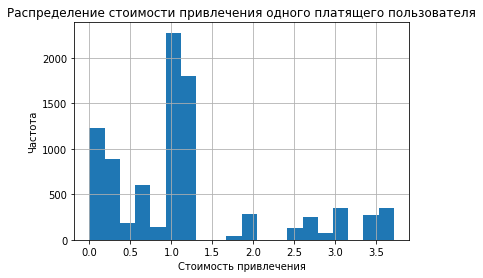

In [33]:
profiles_pay['acquisition_cost'].hist(bins=20)
plt.title('Распределение стоимости привлечения одного платящего пользователя')
plt.xlabel('Стоимость привлечения')
plt.ylabel('Частота')
plt.show()

Посчитаем стоимость привлечения одного клиента в разбивке по каналам привлечения

In [34]:
#исключим пользователей с органическим трафиком
profiles = profiles.query('channel != "organic"')

In [35]:
cac_channel = pd.DataFrame()
cac_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

,acquisition_cost_mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


## Оценим окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

In [36]:
#исключим пользователей с органическим трафиком
profiles = profiles.query('channel != "organic"')

### Проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [37]:
observation_date = datetime(2019, 11, 1) # момент анализа 
horizon_days = 14  # горизонт анализа 
profiles['dt'] = pd.to_datetime(profiles['dt']).astype('datetime64[D]')
profiles_pay['dt'] = pd.to_datetime(profiles['dt']).astype('datetime64[D]')

orders['event_dt'] = pd.to_datetime(orders['event_dt']).astype('datetime64[D]')

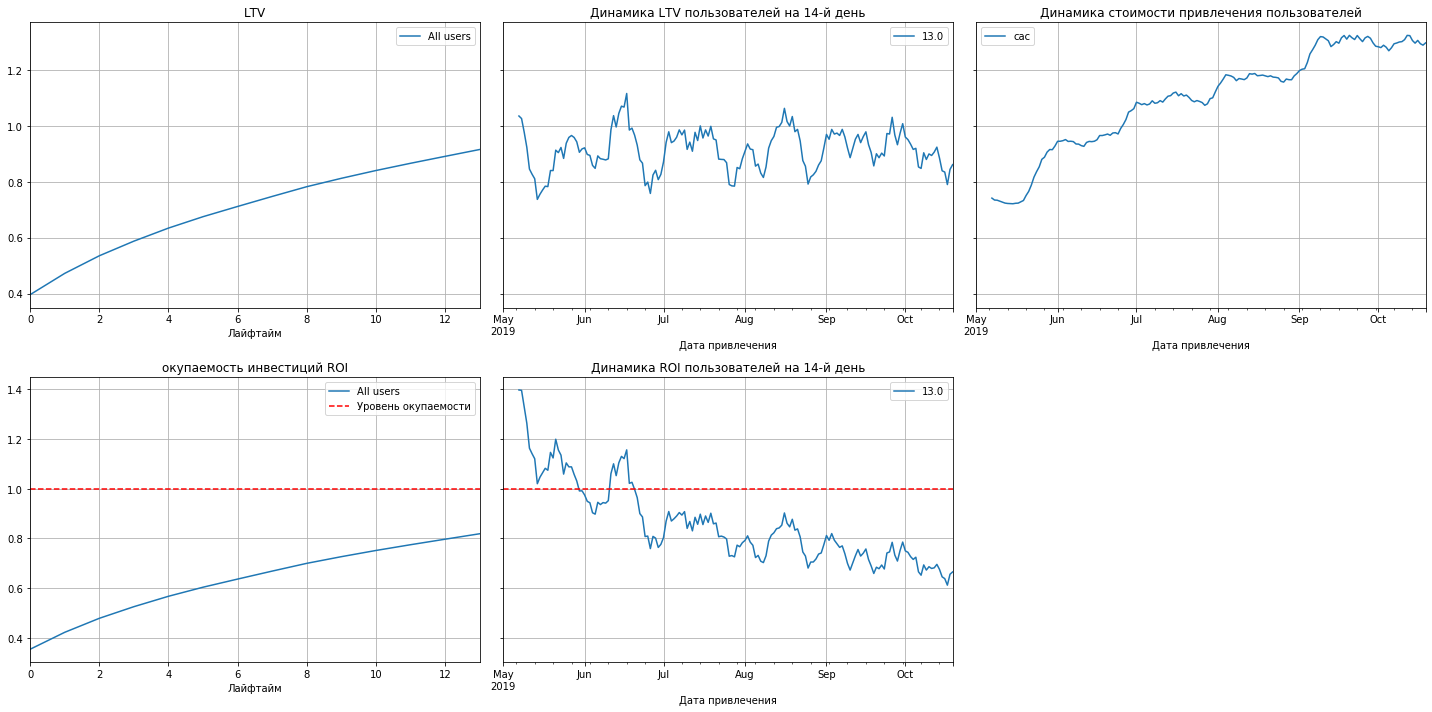

In [38]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

За две недели инвестиции в рекламу не окупаются - ROI примерно 82%.Стоимость привлечения клиента (CAC) растет каждый месяц. 
ROI пользователей резко падает в конце июля и продолжает снижаться. Однако LTV стабильно растет.

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

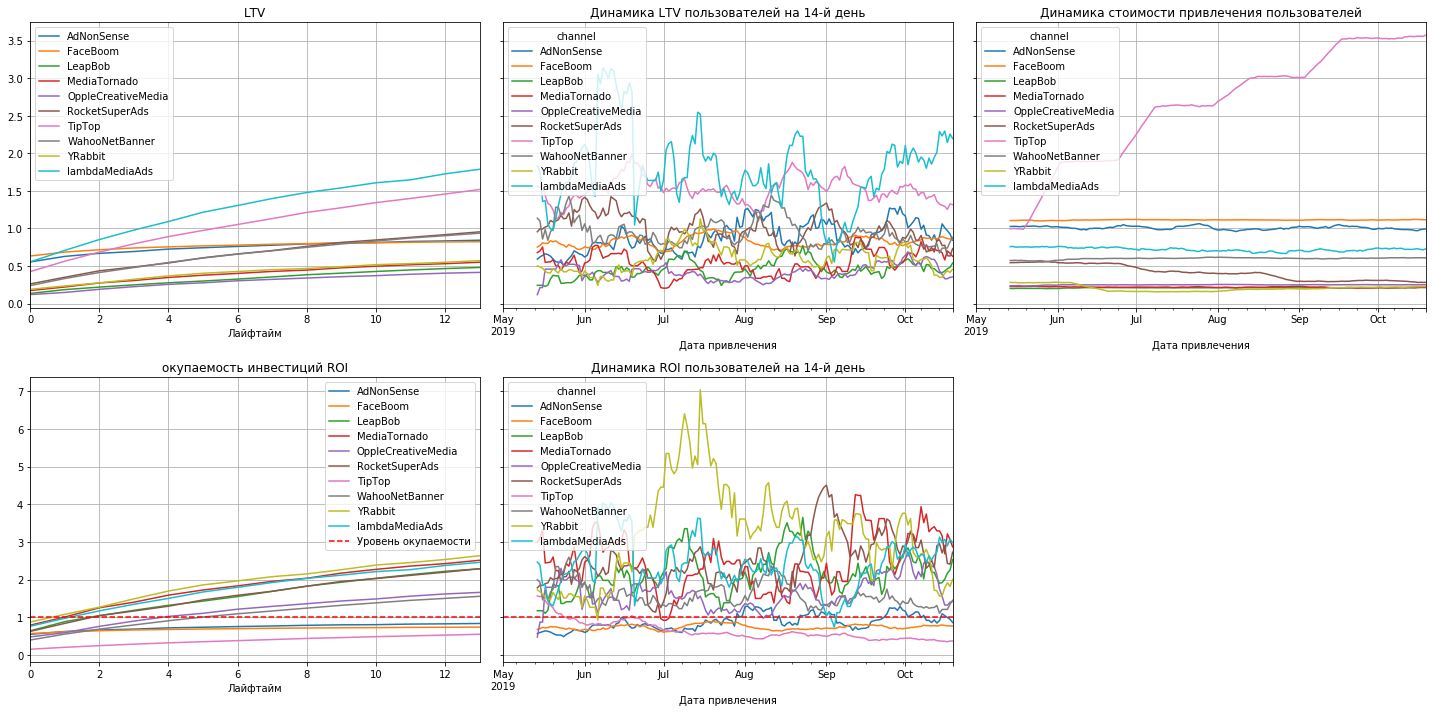

In [39]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Затраты на привлечение клиентов через канал TipTop растут очень быстро и увеличиваются каждый месяц в среднем на 0,5 единиц. Однако у данного источника возрат инвестиций самый маленький.
Также не окупились затраты и на привлечение через каналы FaceBoom и AdNonSence.  
Самым выгодным оказалось вложение на рекламу через канал YRabbit. Затем идут MediaTornado,lambdaMediaAds,LeapBob,RocketSuperAds,OppleCreativeMedia,WahooNetBanner.

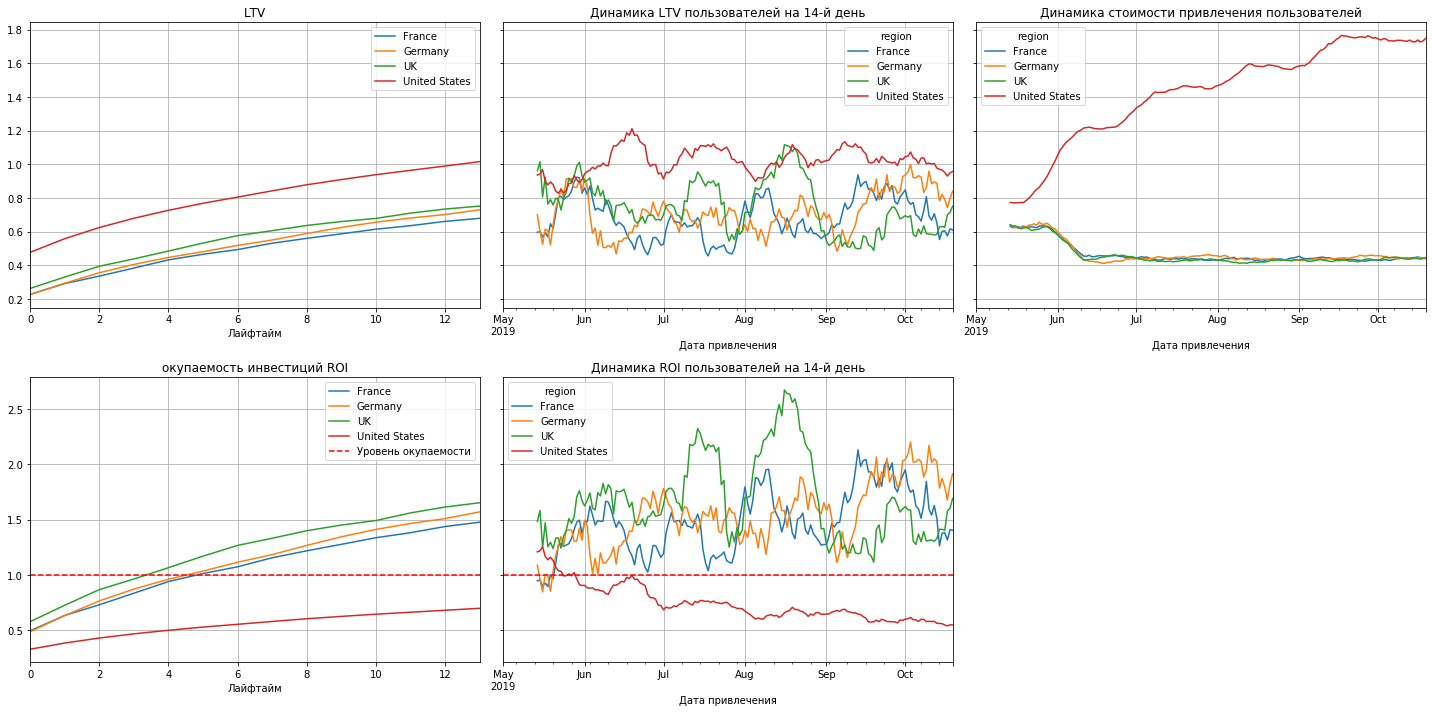

In [40]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Затраты на привлечение клиентов для европейских стран высоки на старте рекламных компаний, и становятся стабильными через месяц после инвестиций. При этом в США совершенно обратная картина - резкий и стабильный ежемесячный рост затрат.

В Англии дела с окупаемость затрат дела идут лучше всех - реклама окупается лучше, чем в других регионах. Далее идет германия, потом Франция. В США окупаемость затрат на рекламу примерно 70%. Окупаемость затрат на рекламу в этой стране резко падает с конца июня. 

Необходимо срочно обратить внимание на рынок США и разобраться с происходящим. Так как основная аудитория нашего приложения - это клиенты из США. 

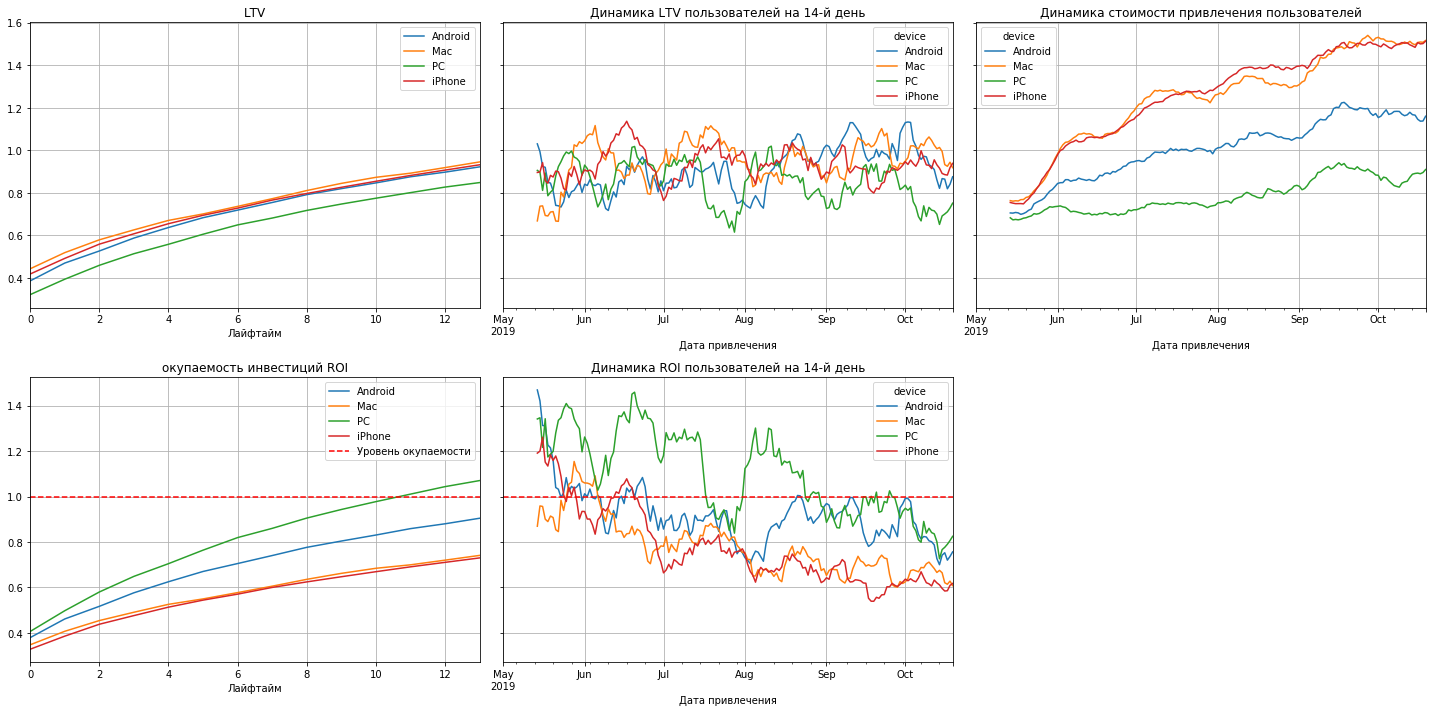

In [41]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

В июне идет резкий спад пожизненной ценности пользователей на устройствах iPhone и МАС. Причем для МАС резкий спад идет с середины июня, а для iPhone уже с середины мая, как и у пользователей Android. Возможно, что то случилось при обновлении приложения на мобильных платформах?
За две недели окупились только затраты на PC. Android почти окупился. А у MAC и iPhone ROI в районе - 75% на 14 день,при том, что стоимость привлечения у этих двух платформ самая высокая.
Стоимость привлечения роста у всех платформ, С одновременным пиком у всех платформ в конце сентября.

### Построим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

УСТРОЙСТВА. Конверсия

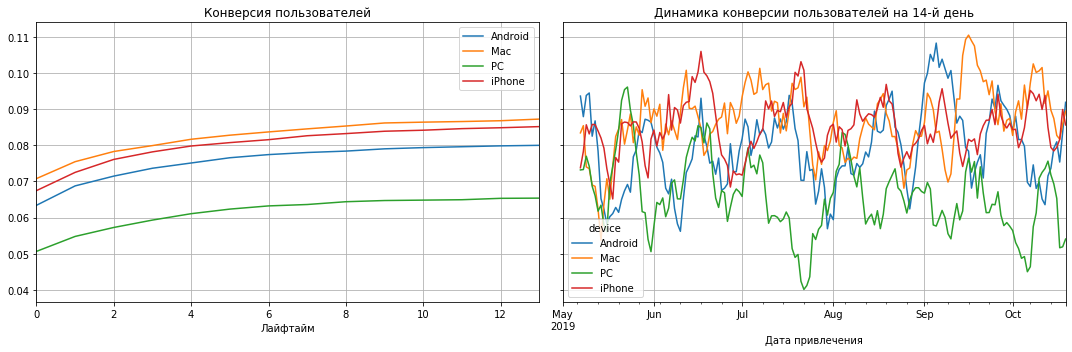

In [42]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

У MAC и iPhone высокая конверсия пользователей. Самая низкая у PC.

УСТРОЙСТВА.Удержание

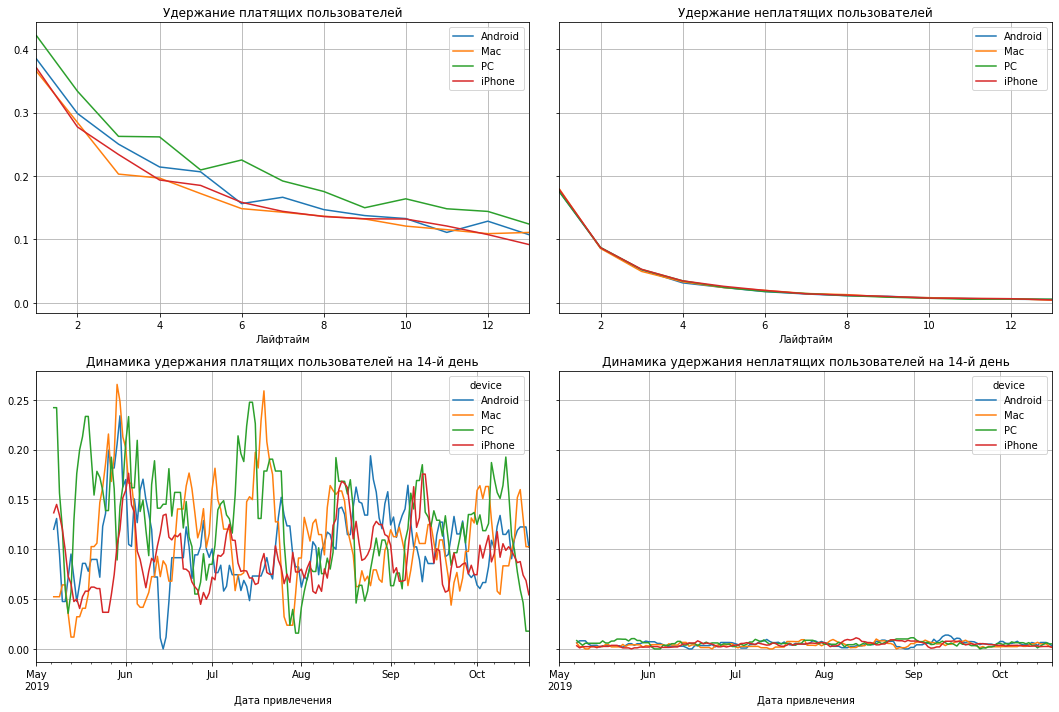

In [43]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание неплатящих пользователей одинаково низкое по всем платформам. Удержание платящих пользователей не сильно отличается от платформы к платформе, однако пользователи PC удерживаются немного лучше.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Мне показался особенно подозрительным тот факт, что удержание неплатящих пользователей из разных каналов, стран, платформ столь ровное, а удержание платящих очень отличается, быть может существует какая-то различная мотивация для платящих пользователей в зависимости от сегмента? Или же количество пользователей платящих существенно ниже и этим объясняется такая странность.
</div>


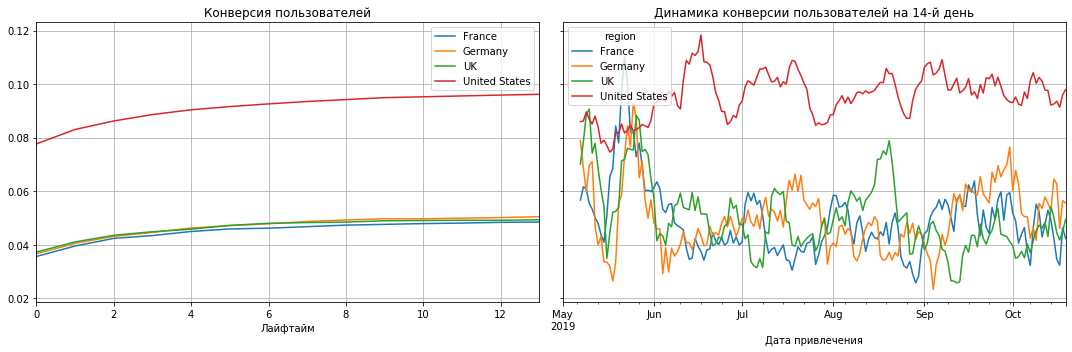

In [44]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия в США самая высокая. В Европе (Франция, Германия, Англия) примерно одинаковая конверсия. Но во Франции самая низкая.


 УДЕРЖАНИЕ.Страны

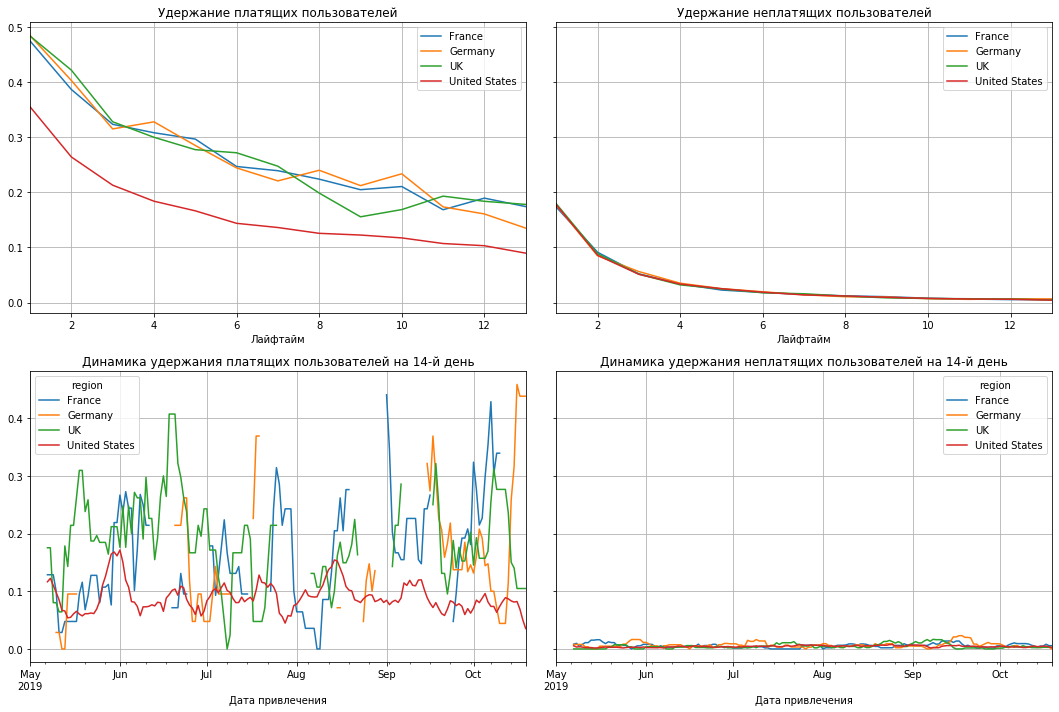

In [45]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Существенная проблема - плохое удержание в US, можно было подробнее посмотреть на всех ли каналах, которые приводят трафик в US, такая ситуация, анонсирую, что два самых крупных канала приводят трафик только из US, если захочешь, можешь поисследовать
</div>


КОНВЕРСИЯ. Каналы привлечения

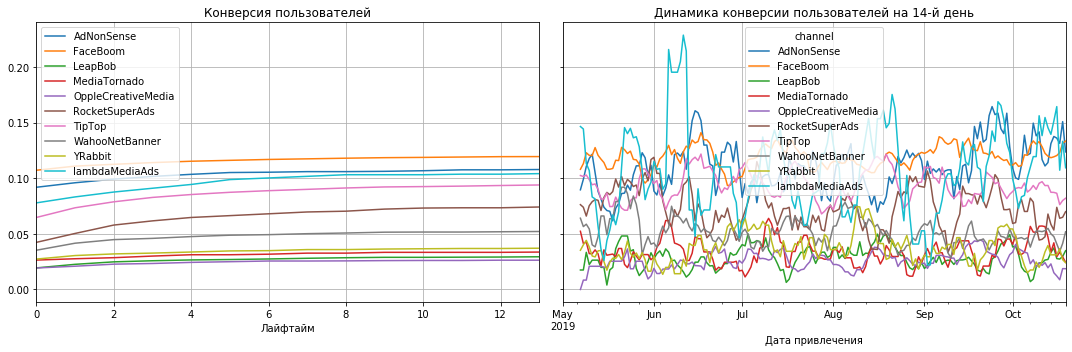

In [46]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Слабая конверсия  YRabbit,LeapBob,MediaTornado и OppleCreativeMedia.

УДЕРЖАНИЕ. Каналы привлечения

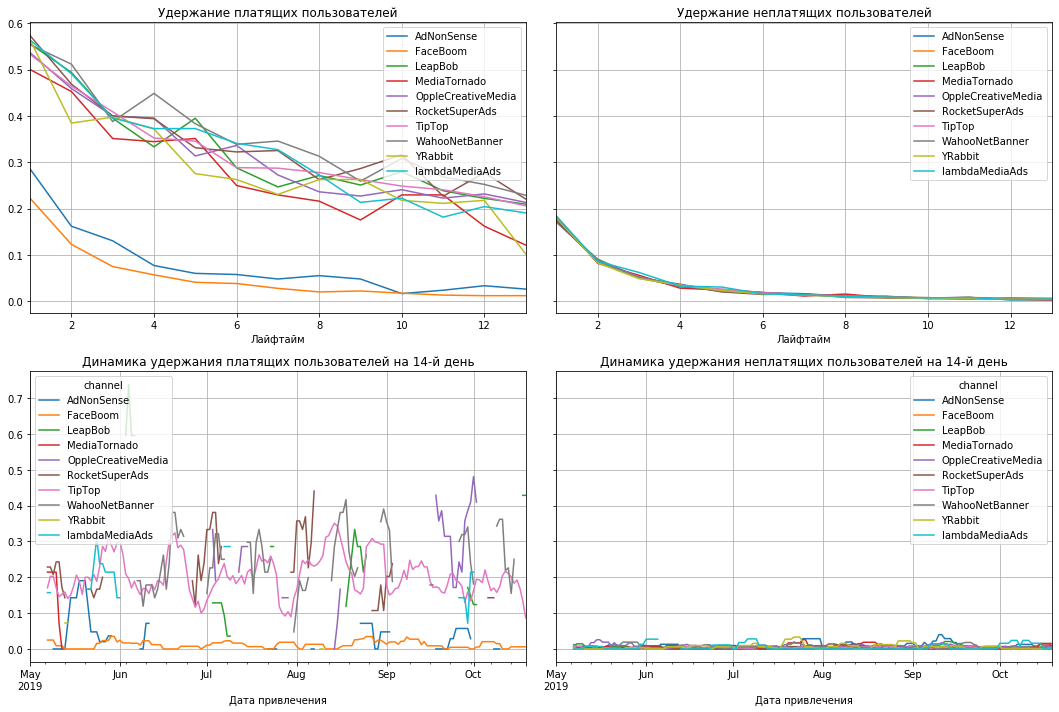

In [47]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Неплатящие пользователи удерживаюся плохо. Самое низкое удержание в каналах FaceBoom и AdNonSense.

## Summary


**ОБЩАЯ ОКУПАЕМОСТЬ ИНВЕСТИЦИЙ**  
По результатам данного анализа общие затраты нашего приложения на  рекламу не окупаются за 2 недели и окупаемость составляет около 82%. При этом нужно отметить, что на окупаемость влияет рынок США – там на 14 день рекламной компании окупаемость составляет только 70%. При том как в европейских странах инвестиции окупаются на 4 день.  Стоимость привлечения клиента (CAC) растет каждый месяц. Однако на общую статистику сильно влияют проблемы с привлечением рекламных средств на рынке США.
ROI пользователей резко падает в конце июля и продолжает снижаться. Однако LTV стабильно растет.
Поэтому расчет ROI и другие показатели необходимо отслеживать строго по региональным признакам.

Затраты на привлечение клиентов для европейских стран высоки на старте рекламных компаний, и становятся стабильными через месяц после инвестиций. При этом в США совершенно обратная картина - резкий и стабильный ежемесячный рост затрат.
В Англии дела с окупаемость затрат дела идут лучше всех - реклама окупается лучше, чем в других регионах. Далее идет Германия, потом Франция. В США окупаемость затрат на рекламу примерно 70%. Окупаемость затрат на рекламу в этой стране резко падает с конца июня.

**РЕГИОНЫ**  
Почти 78% всех платящих пользователей - это клиенты из США. Около 8% - Англия, 7,5% - Франция, около 7% - Германия.

**КАНАЛЫ ПРИВЛЕЧЕНИЯ**  
На привлечение новых клиентов больше всего потратили через каналы TipTop и FaceBoom.
В сентябре и октябре через канал TipTop было потрачено наибольшее количество средств.Затраты на канал Tip-Top постепенно увеличиваются. 
Реклама через каналы TipTop, FaceBoom приносит большую часть прибыли.
На привлечение через каналы AdNonSence, LeapBob, MediaTornado, OppleCreativeMedia, RocketSuperAds,WahooNetBanner, YRabbit и lambdaMediaAds было потрачено намного меньше средств.  Затраты на WahooNetBanner, AdNonSence самые большие среди дешевых каналов привлечения. При этом затраты AdNonSence увеличивались в в мае до значений 50+, и резко снизились в июне. WahooNetBanner - напротив, в мае имели наименьшие показатели и в конце июня резко увеличились.
Мы исключили из подсчетов окупаемости инвестиций пользователей, которые пришли естественным путем, т.е. органически.
Затраты на привлечение клиентов через канал TipTop растут очень быстро и увеличиваются каждый месяц в среднем на 0,5 единиц. Однако у данного источника возрат инвестиций самый маленький. Также не окупились затраты и на привлечение через каналы FaceBoom и AdNonSence. **Самым выгодным оказалось вложение на рекламу через канал YRabbit**. Затем идут MediaTornado,lambdaMediaAds,LeapBob,RocketSuperAds,OppleCreativeMedia,WahooNetBanner.



**УСТРОЙСТВА**  
В июне идет резкий спад жизненной ценности пользователей (LVT) на устройствах iPhone и МАС. Причем **для МАС резкий спад идет с середины июня, а для iPhone уже с середины мая, как и у пользователей Android.** Возможно, что то случилось при обновлении приложения на мобильных платформах? За две недели окупились только затраты на PC. Android почти окупился. А у MAC и iPhone ROI в районе - 75% на 14 день,при том, что стоимость привлечения у этих двух платформ самая высокая. **Стоимость привлечения растет у всех платформ, с одновременным пиком у всех платформ в конце сентября**.
У MAC и iPhone высокая конверсия пользователей. Самая низкая у PC. Возможно опять влияют пользователи из США.
Удержание не платящих пользователей одинаково низкое по всем платформам. Удержание платящих пользователей не сильно отличается от платформы к платформе, однако пользователи PC удерживаются немного лучше.
Конверсия в США самая высокая. В Европе (Франция, Германия, Англия) примерно одинаковая конверсия. Но во Франции самая низкая.


### рекомендации для отдела маркетинга

Необходимо срочно обратить внимание на рынок США и разобраться с происходящим. Так как основная аудитория нашего приложения - это клиенты из США. Возможно понадобится подробней изучить структуру клиентов из данной страны, а также наличие конкурентных приложений и их преимуществ.
Также возможно стоит увеличить горизонт анализа для рынка США. 
Окупаемость пользователей начинает падать с конца июня 2019 года , поэтому  нужно изучить график обновлений и проверить, не мог ли данный факт  повлиять на работу приложения. Возможно появились проблемы в части  локализации приложения на рынок США.

**Также необходимо обратить внимание на мобильное приложение, так как мы имеем резкий спад показателя LVT в мае, именно на мобильных платформах.**

**Окупаемость инвестиций ROI и другие показатели необходимо отслеживать строго по региональным признакам.**

Конверсия пользователей самая низкая во Франции  - необходимо изучить способы увеличение конверсии пользователей во Франции.
Затраты на привлечение клиентов через канал TipTop росли очень быстро и увеличивались каждый месяц в среднем на 0,5 единиц. Однако у данного источника возрат инвестиций самый маленький. Не  окупились затраты и на привлечение через каналы FaceBoom и AdNonSence. Также у FaceBoom и AdNonSence самое низкое удержание. Поэтому возможно исключить эти каналы в следующей рекламной компании . Также **необходимо изучить какие каналы в каких странах более эффективны и при планировании следующей рекламной компании учитывать данную информацию**.  Однако FaceBoom приносит большую часть платящих пользователей, поэтому также необходимо оценить качество данных пользователей подробнее. 